### TRAINING THE LPG-MODEL: Using SVR and Ridge Model

In [1]:
import os
import time
import joblib
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report 
warnings.filterwarnings(action = 'ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

In [2]:
# Load the LPG data
LPG_DF = pd.read_csv("./LPG_Data1.csv")
LPG_DF.fillna(LPG_DF.mean(), inplace=True)

In [3]:
LPG_DF

,CUSTOMER_ID,MEMBERS,LPG_RESULT
0,26,6,36
1,7,5,28
2,43,4,39
3,23,7,44
4,25,2,33
...,...,...,...
49995,45,2,44
49996,35,8,13
49997,28,5,14
49998,50,1,12


In [4]:
# Split the data into features (X) and target (y)
X = LPG_DF[['CUSTOMER_ID', 'MEMBERS']].values
y = LPG_DF['LPG_RESULT'].values

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
# ensures reproducibility, the same split will be generated every time you run the code

In [6]:
print(type(LPG_DF))

<class 'pandas.core.frame.DataFrame'>


In [7]:
print(LPG_DF.isna().sum())
# Count the number of missing values in each column

CUSTOMER_ID    0
MEMBERS        0
LPG_RESULT     0
dtype: int64


In [8]:
LPG_DF = LPG_DF.fillna(LPG_DF.mean(), inplace=True)




In [9]:
# Train the SVR model
regressor = SVR(kernel='rbf') # an instance of the SVR class is created with the kernel parameter set to 'rbf'. 
# radial basis function
regressor.fit(X_train, y_train)

SVR()

In [28]:
# Evaluate the SVR model using cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
svr_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
svr_scores = np.absolute(svr_scores)

In [11]:
# Make predictions using the SVR model on the test set
svr_preds = regressor.predict(X_test)

In [12]:
# Train the Ridge Regression model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

In [29]:
# Evaluate the Ridge Regression model using cross-validation
ridge_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
ridge_scores = np.absolute(ridge_scores)

In [14]:
# Make predictions using the| Ridge Regression model on the test set
ridge_preds = model.predict(X_test)

In [15]:
# Compare the performance of the models on the test set
print('SVR MAE on test set: %.3f' % metrics.mean_absolute_error(y_test, svr_preds))
print('Ridge MAE on test set: %.3f' % metrics.mean_absolute_error(y_test, ridge_preds))
#average absolute difference between the predicted values and the actual values.
#Lower values of MAE and RMSE indicate better model performance, as they represent smaller average errors


SVR MAE on test set: 8.522
Ridge MAE on test set: 8.522


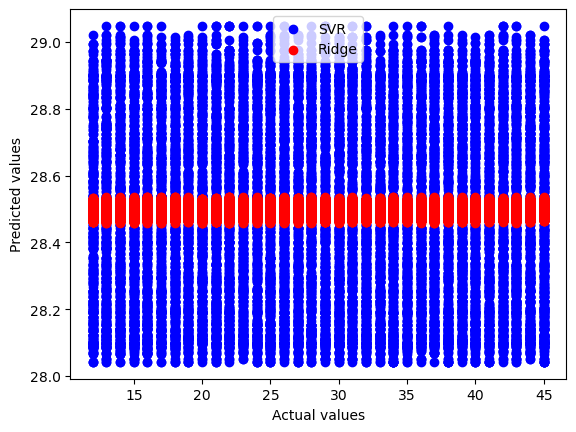

In [16]:
# Visualize the predictions of the two models on the test set
plt.scatter(y_test, svr_preds, color="blue", label="SVR")
plt.scatter(y_test, ridge_preds, color="red", label="Ridge")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.legend()
plt.show()


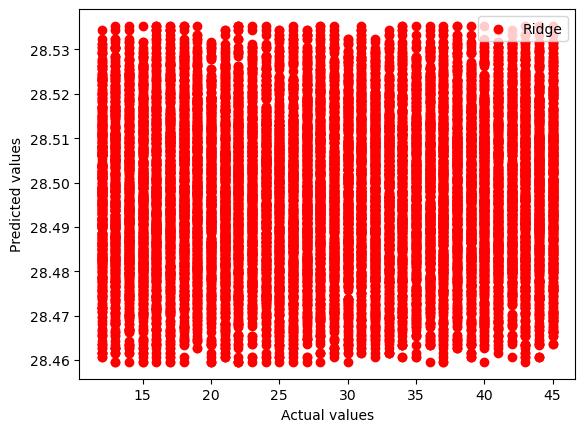

In [19]:
# Visualize the predictions of the two models on the test set
plt.scatter(y_test, ridge_preds, color="red", label="Ridge")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.legend()
plt.show()

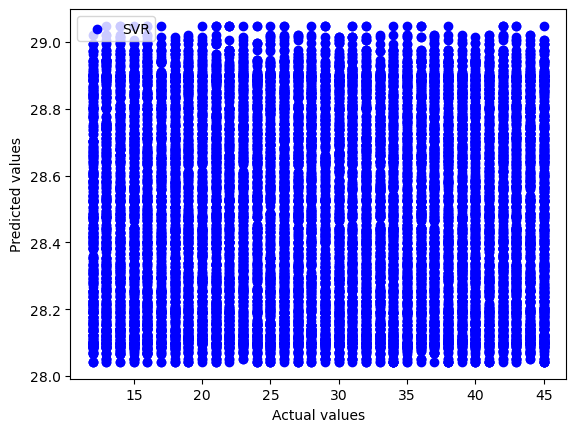

In [20]:
# Visualize the predictions of the two models on the test set
plt.scatter(y_test, svr_preds, color="blue", label="SVR")

plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.legend()
plt.show()


In [21]:
# Compare the performance of the models on the test set
print('SVR MAE on test set: %.3f' % metrics.mean_absolute_error(y_test, svr_preds))
print('Ridge MAE on test set: %.3f' % metrics.mean_absolute_error(y_test, ridge_preds))


SVR MAE on test set: 8.522
Ridge MAE on test set: 8.522


In [22]:
# Calculate RMSE for both the models
print('SVR RMSE on test set: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, svr_preds)))
print('Ridge RMSE on test set: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, ridge_preds)))


SVR RMSE on test set: 9.831
Ridge RMSE on test set: 9.828
